##My experiments with Monte Carlo Simulations

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import random

###Estimating Pi $\pi$

We will generate a bunch of inputs, analyze the outputs and estimate the value of $\pi$. How's this possible?  
Consider a square of length 2 with a unit circle inside. We generate random points inside the square. We assume that $ \frac{\mbox{number of points within the circle}}{\mbox{total number of points}} = \frac{\mbox{area(circle)}}{\mbox{area(square)}}$

Of course, this is not at all accurate if we take a few random points. But with sufficiently large sample size, we will get a close approximation. So, what about $\pi$?

$ \frac{\mbox{area(circle)}}{\mbox{area(square)}} = \frac{\pi r^2}{l^2} = \frac{\pi}{4}$ for a unit circle and a square of length 2

Let's generate a dataframe of 1000 samples with randomized x and y values. 

In [25]:
df = pd.DataFrame({'x':random(1000),'y':random(1000)})

In [9]:
df.head()

,x,y
0,0.116960,0.246016
1,0.764686,0.126647
2,0.836542,0.250002
3,0.039142,0.205430
4,0.076737,0.459403


Now let's plot these random x and y values

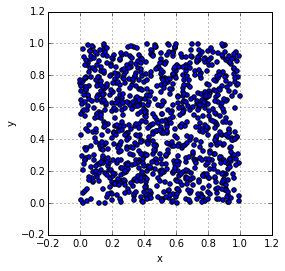

In [107]:
ax = df.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

For easier calculate, let's restrict these values between -1 and 1.

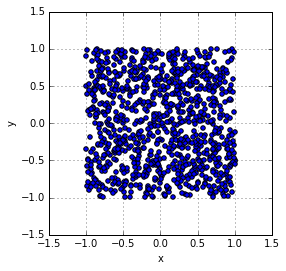

In [109]:
df2 = pd.DataFrame()
df2['x'] = 1 - 2 * df['x']
df2['y'] = 1 - 2 * df['y']
ax = df2.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

In [27]:
df2.describe()

,x,y
count,1000.000000,1000.000000
mean,0.013757,0.011781
std,0.568066,0.571718
min,-0.996989,-0.997801
25%,-0.492942,-0.483869
50%,0.033968,0.026382
75%,0.498658,0.507497
max,0.999095,0.999645


Now let's find out the points that lie inside the unit circle.
i.e, points such that x^2 + y^2 < 1

In [32]:
# The truth values
(df2['x']**2 + df2['y']**2 < 1).head()

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [33]:
# Now we select these values and make a new dataframe
df_circle = df2[df2['x']**2 + df2['y']**2 < 1]

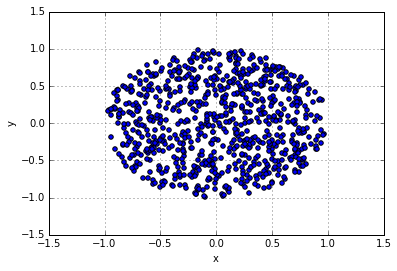

In [35]:
df_circle.plot(x='x',y='y',kind='scatter')

That doesn't quite look like a circle. Let's fix the aspect ratio

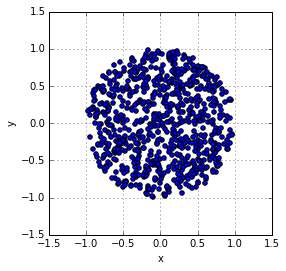

In [39]:
ax = df_circle.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

Much better!

Now, area of this circle is $\pi * 1^2$. Area of the square we plotted earlier is $2^2$. So, the ratio of the $ \frac{area of the circle}{area of the square} = \frac{\pi}{4}$

Let's see if we can estimate $\pi$ using Monte Carlo method. Let's divide the number of points in the circle from the total number of points.

In [47]:
print(len(df_circle))
print(len(df2))
print(len(df_circle)/len(df2))
print(4 * len(df_circle)/len(df2))

800
1000
0.8
3.2


This value is close to the actual value of pi, 3.14. Let's repeat the experiment with a lot more samples.

In [59]:
df_high = pd.DataFrame({'x':1-2*random(10000),'y':1-2*random(10000)})
df_high.head()

,x,y
0,-0.339063,0.966866
1,0.507249,-0.468834
2,0.515510,-0.771811
3,-0.943407,-0.957749
4,0.385889,0.450328


In [60]:
df_circle_high = df_high[df_high['x']**2 + df_high['y']**2 < 1]
print(4* len(df_circle_high)/len(df_high))

3.1504


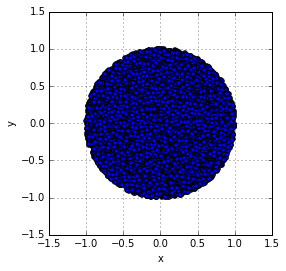

In [61]:
ax = df_circle_high.plot(x='x',y='y',kind='scatter')
ax.set_aspect('equal')

That looks great! And the approximation is closer to the actual value of $\pi$

###Estimating Coin Toss Probability

Let's create a list of samples, -1 for tail and +1 for head

[-1  1  1 -1 -1 -1  1  1 -1 -1]


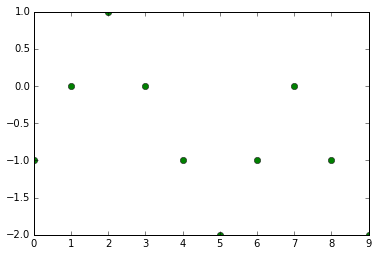

In [102]:
import math
import matplotlib.pyplot as plt

array = np.random.choice([-1,1],10000)
print(array[:10])
plt.plot(array[:10].cumsum(),'go')
plt.show()

Now let's estimate the probabilities of coin toss outcomes

In [106]:
from collections import Counter
counts = Counter(array)
print('Total Heads',counts[1])
print('Total Tails',counts[-1])
print('Final value',array.cumsum()[-1])
print('Probability of Heads', counts[1]/array.size)
print('Probability of Tails', counts[-1]/array.size)

Total Heads 5058
Total Tails 4942
Final value 116
Probability of Heads 0.5058
Probability of Tails 0.4942


This is close to the actual probability of 0.5

In [95]:
# To get an array of -1 and 1 at random
array = random(1000)
print(array[:5])
abs(math.floor(-0.5))
array[array<0.5] = -1
array[array>=0.5] = +1

# Better way
print(np.random.randint(-1,1,10))   # integeres between -1 and 1
print(np.random.choice([-1,1],10))  # integeres -1 and 1 only

print(array.cumsum())

http://stackoverflow.com/questions/3409255/how-do-i-do-conditional-array-arithmetic-on-a-numpy-array

[ 0.59700999  0.52547306  0.5674989   0.84510411  0.99100432]
[ 0  0 -1 -1  0 -1 -1  0 -1  0]
[-1  1 -1 -1 -1  1  1  1  1  1]
[  1.   2.   3.   4.   5.   6.   5.   6.   5.   4.   5.   6.   5.   4.   5.
   6.   5.   4.   5.   4.   5.   6.   5.   6.   7.   6.   7.   8.   9.   8.
   7.   8.   7.   6.   5.   4.   3.   4.   3.   4.   3.   2.   1.   2.   1.
   2.   1.   2.   1.   0.   1.   0.  -1.  -2.  -3.  -2.  -1.  -2.  -1.   0.
  -1.   0.   1.   2.   1.   2.   3.   4.   5.   6.   7.   6.   7.   6.   5.
   6.   7.   8.   7.   8.   7.   8.   7.   8.   9.  10.   9.   8.   7.   8.
   7.   8.   9.   8.   9.   8.   9.   8.   7.   6.   5.   6.   7.   6.   7.
   6.   5.   6.   7.   6.   5.   6.   7.   6.   5.   4.   3.   4.   3.   4.
   5.   6.   7.   8.   9.   8.   9.  10.   9.   8.   9.  10.  11.  10.   9.
   8.   9.   8.   9.   8.   9.   8.   9.   8.   9.  10.  11.  10.   9.  10.
  11.  10.   9.   8.   7.   8.   7.   8.   9.  10.  11.  10.  11.  12.  11.
  10.  11.  12.  11.  10.  11.  12.  1